In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utils.notebooks as nb
from utils.loader import DicomDataset3D
import models.get_model
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
from models.WNet import WNet
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

BATCH_SIZE = 2
EPOCHS = 14
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = WNet()

train_dataloader = DataLoader(DicomDataset3D("data/train.csv"), batch_size=BATCH_SIZE)
test_dataloader = DataLoader(DicomDataset3D("data/test.csv"), batch_size=BATCH_SIZE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([10]).to(device)).to(device)

## Training

In [3]:
for epoch in range(EPOCHS):
    for data in iter(train_dataloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # print(f'max label: {torch.max(labels)}')
        optimizer.zero_grad()

        output = model(inputs)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()
    writer.add_scalar("Loss/train", loss, epoch)
    print(loss)

tensor(2.5456, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.5267, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.5090, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.4510, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.4202, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.3641, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.3426, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.3319, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.3182, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.3084, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.3016, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(2.2962, device='cuda:0',


In [4]:
"""
from models.WNet import WNet, UNet
import torch
import hiddenlayer as hl
from utils.loader import DicomDataset3D
from torch.utils.data import DataLoader
BATCH_SIZE = 2
device = 'cuda'

train_dataloader = DataLoader(DicomDataset3D("data/train.csv"), batch_size=BATCH_SIZE)

with torch.no_grad():
    x, y = next(iter(train_dataloader))
    if torch.cuda.is_available():
        x, y = x.cuda(), y.cuda()

    model = WNet().to(device)
    # transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.
    graph = hl.build_graph(model, torch.squeeze(x, 2))
    graph.theme = hl.graph.THEMES['blue'].copy()
    graph.save('rnn_hiddenlayer', format='png')
"""


'\nfrom models.WNet import WNet, UNet\nimport torch\nimport hiddenlayer as hl\nfrom utils.loader import DicomDataset3D\nfrom torch.utils.data import DataLoader\nBATCH_SIZE = 2\ndevice = \'cuda\'\n\ntrain_dataloader = DataLoader(DicomDataset3D("data/train.csv"), batch_size=BATCH_SIZE)\n\nwith torch.no_grad():\n    x, y = next(iter(train_dataloader))\n    if torch.cuda.is_available():\n        x, y = x.cuda(), y.cuda()\n\n    model = WNet().to(device)\n    # transforms = [ hl.transforms.Prune(\'Constant\') ] # Removes Constant nodes from graph.\n    graph = hl.build_graph(model, torch.squeeze(x, 2))\n    graph.theme = hl.graph.THEMES[\'blue\'].copy()\n    graph.save(\'rnn_hiddenlayer\', format=\'png\')\n'

## Testing

torch.Size([2, 1, 88, 256, 256])
torch.Size([2, 1, 88, 256, 256])


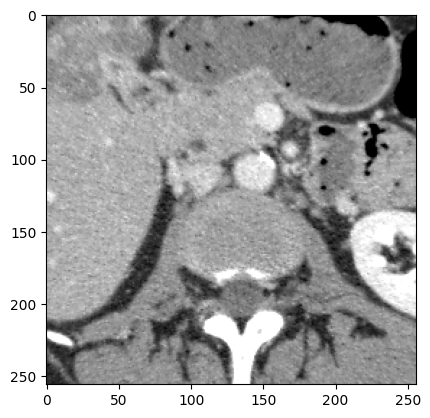

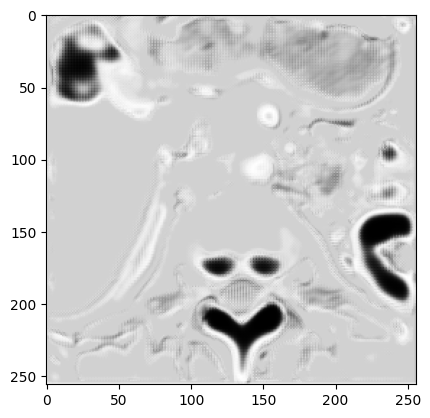

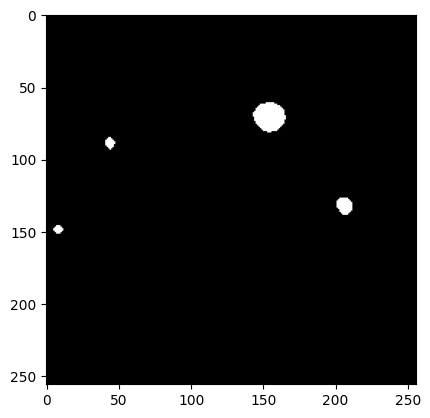

tensor(0.5000, device='cuda:0', dtype=torch.float16)
tensor(0.7261, device='cuda:0', dtype=torch.float16)


In [5]:
with torch.no_grad():
    x, y = next(iter(train_dataloader))
    print(x.shape)
    if torch.cuda.is_available():
        x, y = x.cuda(), y.cuda()
    pred = model(x)
    pred = torch.nn.Sigmoid()(pred)
    print(pred.shape)
    nb.show(x[0], 55)
    nb.show(pred[0], 55)
    nb.show(y[0], 55)
    print(torch.min(pred))
    print(torch.max(pred))

In [ ]:

writer.add_graph(model, next(iter(train_dataloader))[0].to(device))
writer.flush()